Part 1 - Setup and Data Preparation
In this section, we will:

- Import necessary packages for this demonstration
- Load the data
- Ensure that qualitative predictor variables are of the category data type

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import 'numpy' and 'pandas' for working with numbers and data frames
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import method for regression from 'statsmodels'
import statsmodels.formula.api as smf

# Import method for regression from 'sklearn'
from sklearn.linear_model import LinearRegression

# Import 'train_test_split' from 'sklearn' for train-validation-test split
from sklearn.model_selection import train_test_split

# Import 'mean_squared_error' from 'sklearn' for error computations
from sklearn.metrics import mean_squared_error

# Import method to compute VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv(r'E:\Data Science\Upgrad\ML\Multiple Linear Regression\Bike Sharing\day.csv', index_col = 'instant')
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Load the data description and take a look at it
dd = pd.read_csv(r'E:\Data Science\Upgrad\ML\Multiple Linear Regression\Bike Sharing\Data Description.csv')
dd

,instant: record index
0,dteday : date
1,"season : season (1:spring, 2:summer, 3:fall, 4..."
2,"yr : year (0: 2018, 1:2019)"
3,mnth : month ( 1 to 12)
4,holiday : weather day is a holiday or not (ext...
5,weekday : day of the week
6,workingday : if day is neither weekend nor hol...
7,weathersit :
8,"Clear, Few clouds, Partly cloudy, Partly cloudy"
9,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [5]:
df['season'] = df['season'].astype('category')

In [6]:
df['season'] = df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}).astype('category')

In [7]:
df['yr'].unique()

array([0, 1], dtype=int64)

In [8]:
df['yr'] = df['yr'].astype('category')

In [9]:
df['yr']=df['yr'].replace({0:2018, 1:2019})

In [10]:
df['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [11]:
df['mnth'] = df['mnth'].astype('category')

In [12]:
df['mnth'] = df['mnth'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct',
                                11:'Nov', 12:'Dec'})

In [13]:
df['holiday'].unique()

array([0, 1], dtype=int64)

In [14]:
df['holiday'] = df['holiday'].astype('category')

In [15]:
df['weekday'].unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [16]:
df['weekday'] = df['weekday'].astype('category')

In [17]:
df['workingday'].unique()

array([1, 0], dtype=int64)

In [18]:
df['workingday'] = df['workingday'].astype('category')

In [19]:
df['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [20]:
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')
df['wd'] = (df['dteday'].dt.dayofweek + 1) % 7 # Sunday=0, Saturday=6

In [21]:
df['wd'] = df['wd'].astype('category')

In [22]:
df['weekdayeqwd'] = df['weekday'] == df['wd']
df['weekdayeqwd'].unique()

array([ True])

In [23]:
df['weekday'] = df['weekday'].replace({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

In [24]:
df['weekday'].unique()

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
Categories (7, object): ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

In [25]:
df.drop(labels='wd', axis=1, inplace=True)
df.drop(labels='weekdayeqwd', axis=1, inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    category      
 2   yr          730 non-null    category      
 3   mnth        730 non-null    category      
 4   holiday     730 non-null    category      
 5   weekday     730 non-null    category      
 6   workingday  730 non-null    category      
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: category(6), datetime64[ns](1), float64(4), int64(4)
memory usage: 62.6

In [27]:
df.shape

(730, 15)

In [28]:
df.isnull().sum().sort_values(ascending=False)

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [29]:
categorical_columns=df.select_dtypes(include='category').columns

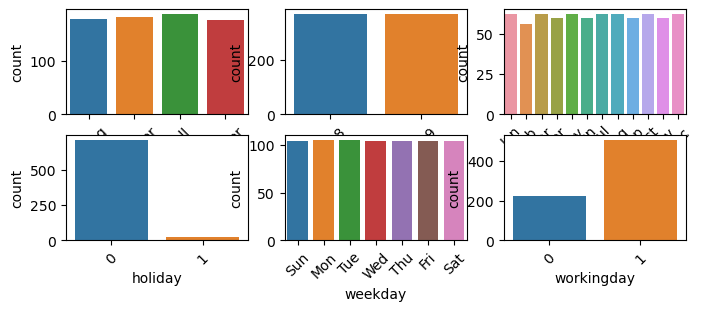

In [30]:
plt.figure(figsize = (8, 3))

fignum = 0
for featurename in categorical_columns:
    fignum = fignum + 1
    plt.subplot(2, 3, fignum)
    sns.countplot(data = df, x = featurename)
    plt.xticks(rotation = 45)
#plt.tight_layout()

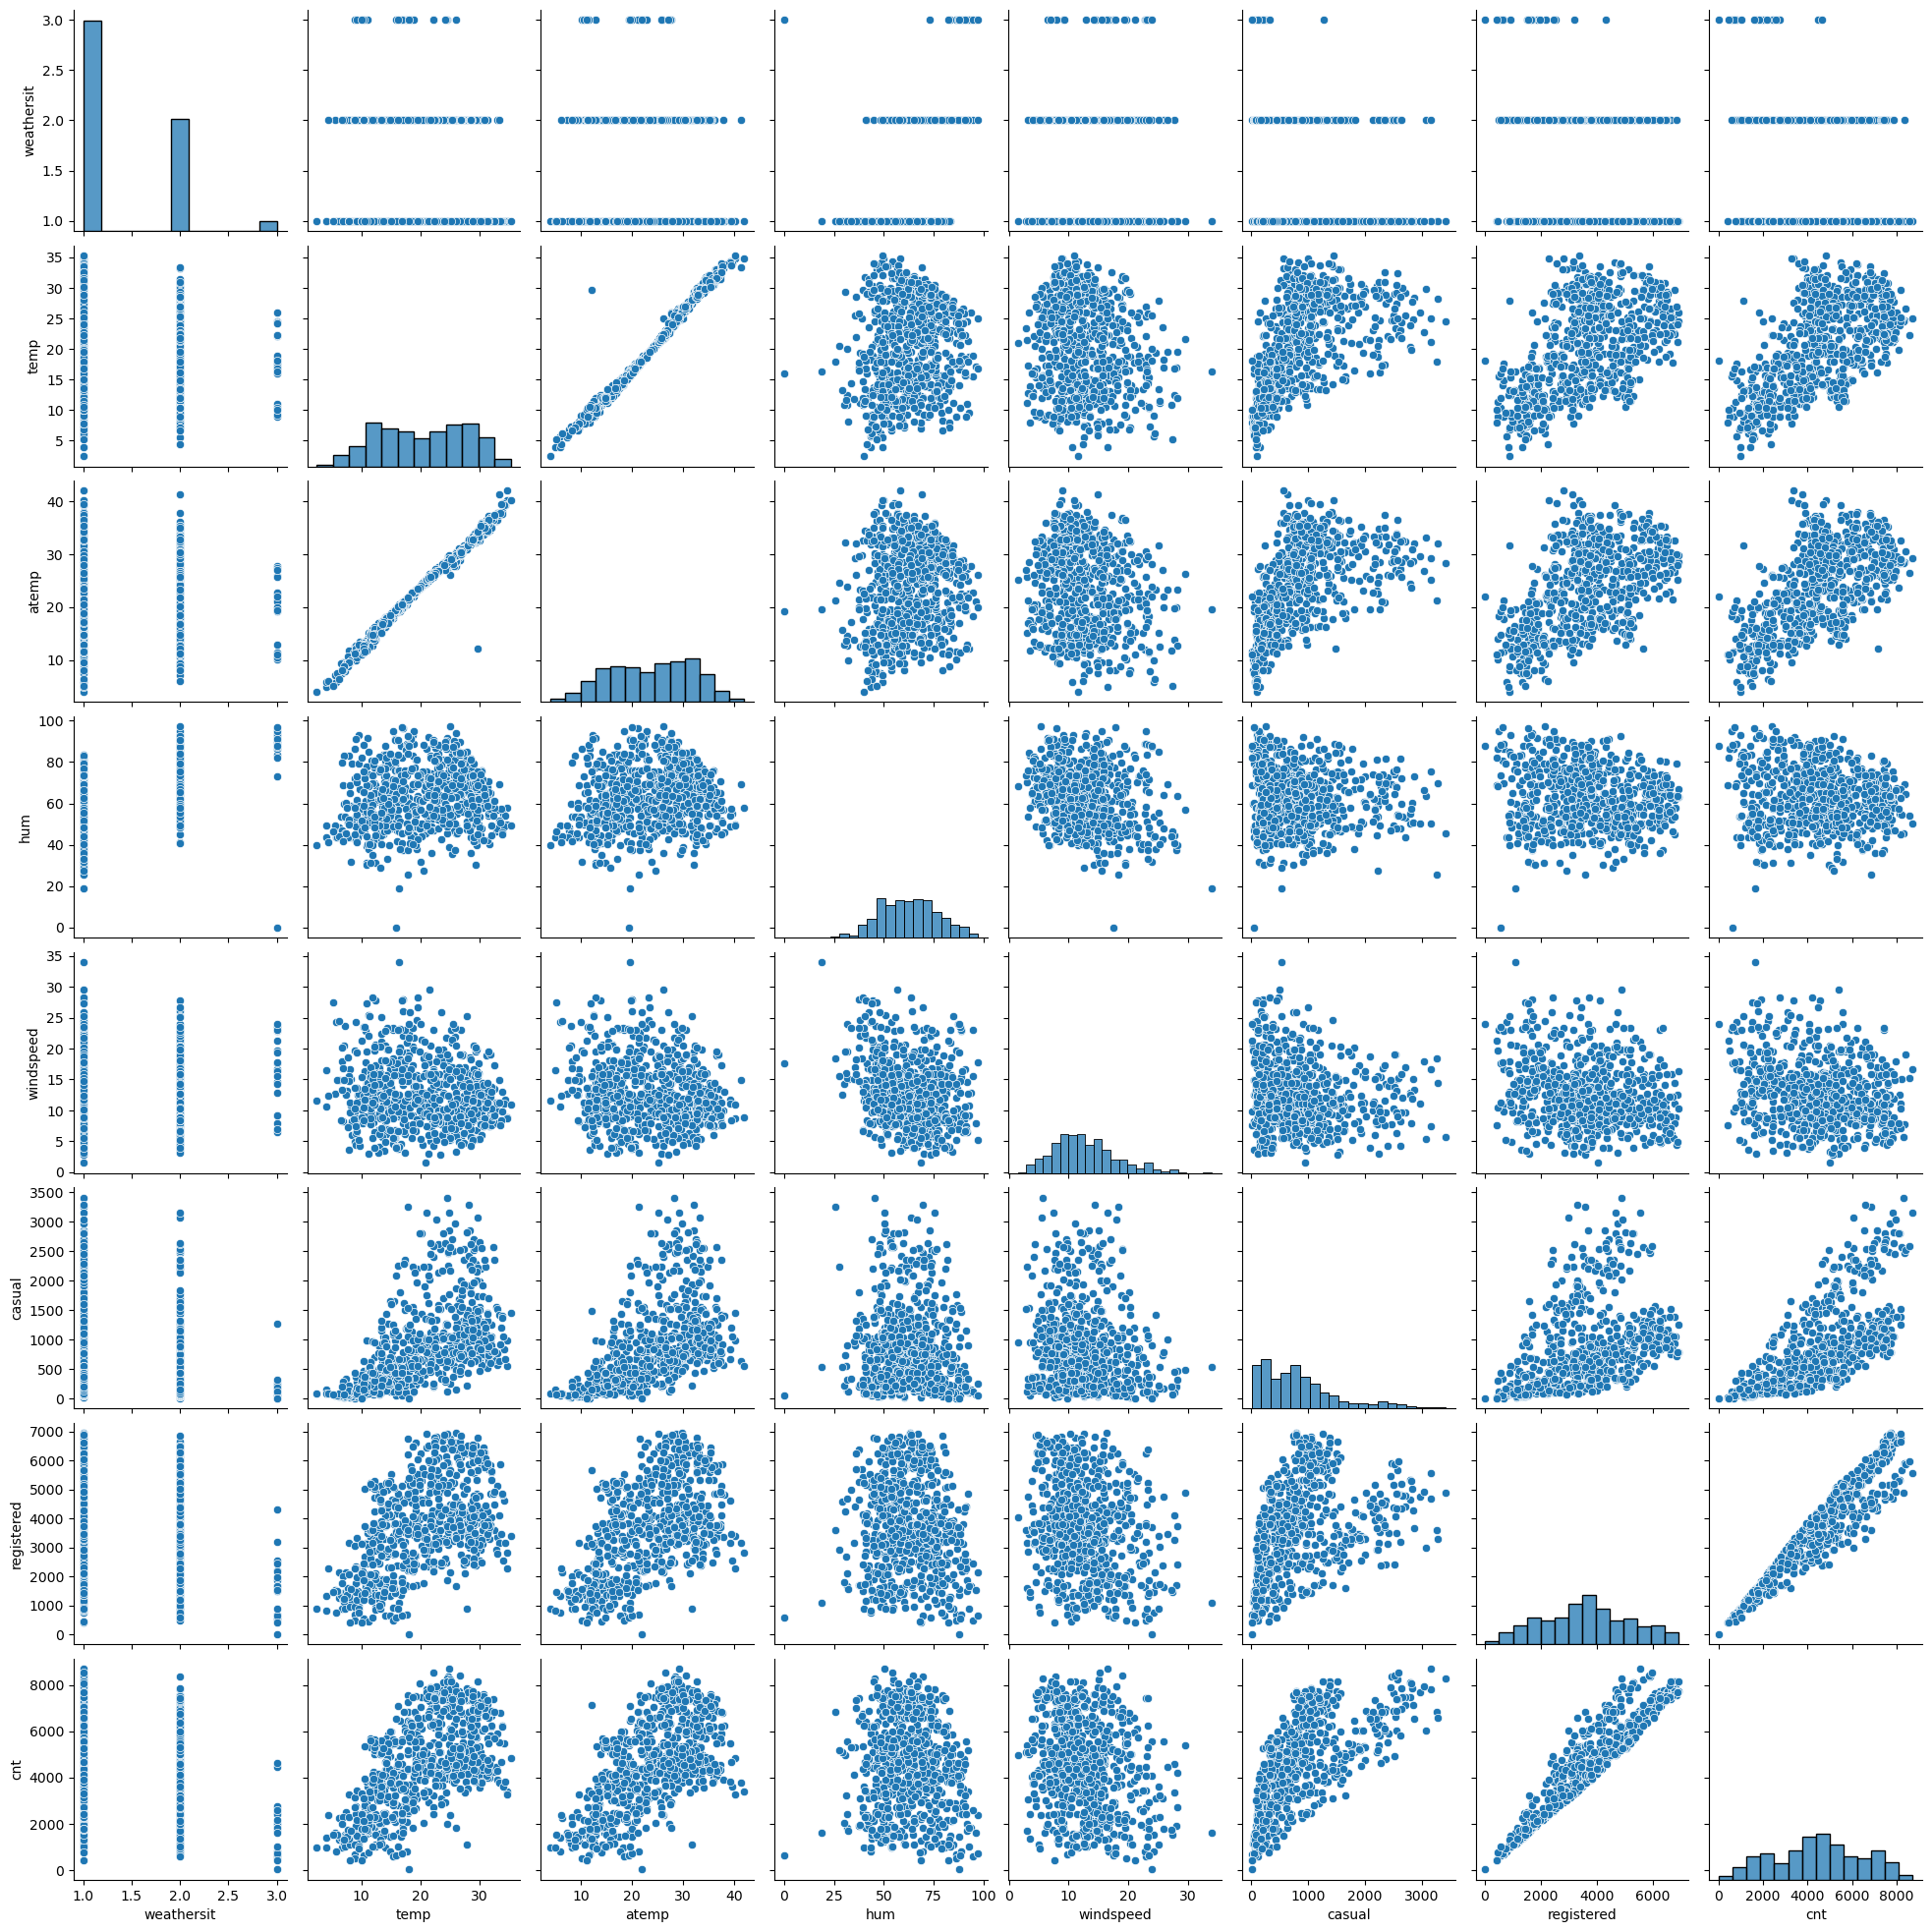

In [31]:
sns.pairplot(df)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    category      
 2   yr          730 non-null    category      
 3   mnth        730 non-null    category      
 4   holiday     730 non-null    category      
 5   weekday     730 non-null    category      
 6   workingday  730 non-null    category      
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: category(6), datetime64[ns](1), float64(4), int64(4)
memory usage: 62.6

In [33]:
df.corr().round(2)

,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
weathersit,1.00,-0.12,-0.12,0.59,0.04,-0.25,-0.26,-0.30
temp,-0.12,1.00,0.99,0.13,-0.16,0.54,0.54,0.63
atemp,-0.12,0.99,1.00,0.14,-0.18,0.54,0.54,0.63
hum,0.59,0.13,0.14,1.00,-0.25,-0.08,-0.09,-0.10
windspeed,0.04,-0.16,-0.18,-0.25,1.00,-0.17,-0.22,-0.24
casual,-0.25,0.54,0.54,-0.08,-0.17,1.00,0.39,0.67
registered,-0.26,0.54,0.54,-0.09,-0.22,0.39,1.00,0.95
cnt,-0.30,0.63,0.63,-0.10,-0.24,0.67,0.95,1.00


In [34]:
df=pd.get_dummies(data=df, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday'], drop_first=True)
df.corr().round(2)

,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_Summer,season_Fall,...,mnth_Nov,mnth_Dec,holiday_1,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,workingday_1
weathersit,1.00,-0.12,-0.12,0.59,0.04,-0.25,-0.26,-0.30,0.01,-0.10,...,-0.02,0.08,-0.03,-0.02,-0.02,-0.02,-0.01,0.03,0.04,-0.03
temp,-0.12,1.00,0.99,0.13,-0.16,0.54,0.54,0.63,0.15,0.68,...,-0.21,-0.29,-0.03,-0.04,-0.02,0.00,0.02,0.03,0.02,0.00
atemp,-0.12,0.99,1.00,0.14,-0.18,0.54,0.54,0.63,0.16,0.66,...,-0.20,-0.28,-0.03,-0.03,-0.02,0.01,0.03,0.03,0.01,0.01
hum,0.59,0.13,0.14,1.00,-0.25,-0.08,-0.09,-0.10,-0.00,0.02,...,-0.01,0.08,-0.02,-0.01,0.03,0.02,0.00,0.03,-0.03,0.05
windspeed,0.04,-0.16,-0.18,-0.25,1.00,-0.17,-0.22,-0.24,0.10,-0.14,...,-0.03,-0.05,0.01,0.02,0.01,-0.01,-0.03,-0.00,0.00,-0.00
casual,-0.25,0.54,0.54,-0.08,-0.17,1.00,0.39,0.67,0.22,0.30,...,-0.10,-0.22,0.05,0.30,0.07,-0.13,-0.16,-0.16,-0.10,-0.09
registered,-0.26,0.54,0.54,-0.09,-0.22,0.39,1.00,0.95,0.08,0.30,...,-0.00,-0.12,-0.11,-0.20,-0.09,0.04,0.12,0.10,0.07,0.01
cnt,-0.30,0.63,0.63,-0.10,-0.24,0.67,0.95,1.00,0.15,0.35,...,-0.04,-0.17,-0.07,-0.05,-0.05,-0.01,0.04,0.02,0.03,-0.03
season_Summer,0.01,0.15,0.16,-0.00,0.10,0.22,0.08,0.15,1.00,-0.34,...,-0.17,-0.18,-0.02,-0.00,-0.00,0.01,0.01,-0.00,-0.00,0.01
season_Fall,-0.10,0.68,0.66,0.02,-0.14,0.30,0.30,0.35,-0.34,1.00,...,-0.18,-0.18,-0.03,-0.01,-0.01,-0.01,0.00,0.01,0.01,-0.01


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dteday         730 non-null    datetime64[ns]
 1   weathersit     730 non-null    int64         
 2   temp           730 non-null    float64       
 3   atemp          730 non-null    float64       
 4   hum            730 non-null    float64       
 5   windspeed      730 non-null    float64       
 6   casual         730 non-null    int64         
 7   registered     730 non-null    int64         
 8   cnt            730 non-null    int64         
 9   season_Summer  730 non-null    uint8         
 10  season_Fall    730 non-null    uint8         
 11  season_Winter  730 non-null    uint8         
 12  yr_2019        730 non-null    uint8         
 13  mnth_Feb       730 non-null    uint8         
 14  mnth_Mar       730 non-null    uint8         
 15  mnth_Apr       730 non-

In [36]:
X=df.drop(labels='cnt', axis=1)
y=df['cnt']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [38]:
print('Train Dataset Size: ', len(X_train))
print('Test Dataset Size: ', len(X_test))

Train Dataset Size:  584
Test Dataset Size:  146


### Model 1

In [39]:
lr_model_1=smf.ols('cnt ~ weathersit', data=df)
lr_model_1=lr_model_1.fit()
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     69.87
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           3.20e-16
Time:                        16:01:21   Log-Likelihood:                -6526.8
No. Observations:                 730   AIC:                         1.306e+04
Df Residuals:                     728   BIC:                         1.307e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5974.4897    188.334     31.723      0.0

In [40]:
lr_model_2=smf.ols('cnt ~ temp', data=df)
lr_model_2=lr_model_2.fit()
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     471.7
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           5.07e-81
Time:                        16:01:21   Log-Likelihood:                -6377.9
No. Observations:                 730   AIC:                         1.276e+04
Df Residuals:                     728   BIC:                         1.277e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1222.0403    161.278      7.577      0.0

In [41]:
lr_model_3=smf.ols('cnt ~ atemp', data=df)
lr_model_3=lr_model_3.fit()
print(lr_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     480.8
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           3.20e-82
Time:                        16:01:21   Log-Likelihood:                -6375.2
No. Observations:                 730   AIC:                         1.275e+04
Df Residuals:                     728   BIC:                         1.276e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    953.5184    171.385      5.564      0.0

In [42]:
lr_model_4=smf.ols('cnt ~ hum', data=df)
lr_model_4=lr_model_4.fit()
print(lr_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.139
Date:                Fri, 01 Mar 2024   Prob (F-statistic):            0.00771
Time:                        16:01:21   Log-Likelihood:                -6556.7
No. Observations:                 730   AIC:                         1.312e+04
Df Residuals:                     728   BIC:                         1.313e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5349.0446    322.765     16.573      0.0

In [43]:
lr_model_5=smf.ols('cnt ~ windspeed', data=df)
lr_model_5=lr_model_5.fit()
print(lr_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     42.60
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           1.26e-10
Time:                        16:01:21   Log-Likelihood:                -6539.5
No. Observations:                 730   AIC:                         1.308e+04
Df Residuals:                     728   BIC:                         1.309e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5626.2562    184.954     30.420      0.0

In [44]:
lr_model_6=smf.ols('cnt ~ weathersit + temp + atemp + hum + windspeed', data=df)
lr_model_6=lr_model_6.fit()
print(lr_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     130.0
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           3.16e-98
Time:                        16:01:21   Log-Likelihood:                -6326.4
No. Observations:                 730   AIC:                         1.266e+04
Df Residuals:                     724   BIC:                         1.269e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3810.4968    352.587     10.807      0.0

In [45]:
numerical_columns = ['weathersit', 'temp', 'atemp', 'hum', 'windspeed']
vif_data = pd.DataFrame()
vif_data['feature'] = numerical_columns
vif_data['VIF'] = [variance_inflation_factor(df[numerical_columns].values, i) for i in range(len(df[numerical_columns].columns))]
vif_data.round(2)

,feature,VIF
0,weathersit,12.98
1,temp,489.49
2,atemp,546.65
3,hum,25.49
4,windspeed,4.94


In [46]:
lr_model_7=smf.ols('cnt ~ weathersit + hum + windspeed', data=df)
lr_model_7=lr_model_7.fit()
print(lr_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     38.73
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           3.20e-23
Time:                        16:01:21   Log-Likelihood:                -6506.1
No. Observations:                 730   AIC:                         1.302e+04
Df Residuals:                     726   BIC:                         1.304e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6812.9545    393.498     17.314      0.0

In [47]:
lr_model_8=smf.ols('cnt ~ temp + atemp', data=df)
lr_model_8=lr_model_8.fit()
print(lr_model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     240.2
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           8.03e-81
Time:                        16:01:21   Log-Likelihood:                -6375.1
No. Observations:                 730   AIC:                         1.276e+04
Df Residuals:                     727   BIC:                         1.277e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    987.1643    188.400      5.240      0.0